<a href="https://colab.research.google.com/github/arnaldourbina/HACKATON_Equipo_H12-25-L-Equipo74/blob/main/An%C3%A1lisis_flights2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Estudiando los datos

In [1]:
import pandas as pd

In [2]:
datos = pd.read_csv("/content/flights2015.csv")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Diccionario de traducción de columnas
columnas_es = {
    "YEAR": "AÑO",
    "MONTH": "MES",
    "DAY": "DÍA",
    "DAY_OF_WEEK": "DÍA_SEMANA",
    "AIRLINE":"AEROLÍNEA",
    "FLIGHT_NUMBER": "NÚMERO_VUELO",
    "TAIL_NUMBER":"NÚMERO_DEL_AVIÓN",
    "ORIGIN_AIRPORT":"AEROPUERTO_ORIGEN",
    "DESTINATION_AIRPORT":"AEROPUERTO_DESTINO",
    "SCHEDULED_DEPARTURE": "SALIDA_PROGRAMADA",
    "DEPARTURE_TIME": "HORA_SALIDA",
    "DEPARTURE_DELAY": "RETRASO_SALIDA",
    "TAXI_OUT": "RODAJE_SALIDA",
    "WHEELS_ON":"ATERRIZAJE",
    "TAXI_IN":"RODAJE_LLEGADA",
    "WHEELS_OFF": "DESPEGUE",
    "SCHEDULED_ARRIVAL": "LLEGADA_PROGRAMADA",
    "ARRIVAL_TIME": "HORA_LLEGADA",
    "ARRIVAL_DELAY": "RETRASO_LLEGADA",
    "DIVERTED": "DESVIADO",
    "CANCELLED": "CANCELADO",
    "AIR_SYSTEM_DELAY": "RETRASO_SISTEMA_AÉREO",
    "SECURITY_DELAY": "RETRASO_SEGURIDAD",
    "AIRLINE_DELAY": "RETRASO_AEROLÍNEA",
    "LATE_AIRCRAFT_DELAY": "RETRASO_AVIÓN_TARDÍO",
    "WEATHER_DELAY": "RETRASO_CLIMA",
    "SCHEDULED_TIME":"TIEMPO_PROGRAMADO",
    "ELAPSED_TIME":"TIEMPO_TOTAL_REAL",
    "AIR_TIME":"TIEMPO_EN_AIRE",
    "DISTANCE":"DISTANCIA",
    "CANCELLATION_REASON":"RAZÓN_CANCELACIÓN"

}

# Aplicar la traducción
datos = datos.rename(columns=columnas_es)

# Verificar
print(datos.columns)

Index(['AÑO', 'MES', 'DÍA', 'DÍA_SEMANA', 'AEROLÍNEA', 'NÚMERO_VUELO',
       'NÚMERO_DEL_AVIÓN', 'AEROPUERTO_ORIGEN', 'AEROPUERTO_DESTINO',
       'SALIDA_PROGRAMADA', 'HORA_SALIDA', 'RETRASO_SALIDA', 'RODAJE_SALIDA',
       'DESPEGUE', 'TIEMPO_PROGRAMADO', 'TIEMPO_TOTAL_REAL', 'TIEMPO_EN_AIRE',
       'DISTANCIA', 'ATERRIZAJE', 'RODAJE_LLEGADA', 'LLEGADA_PROGRAMADA',
       'HORA_LLEGADA', 'RETRASO_LLEGADA', 'DESVIADO', 'CANCELADO',
       'RAZÓN_CANCELACIÓN', 'RETRASO_SISTEMA_AÉREO', 'RETRASO_SEGURIDAD',
       'RETRASO_AEROLÍNEA', 'RETRASO_AVIÓN_TARDÍO', 'RETRASO_CLIMA'],
      dtype='object')


In [5]:
# TRANSFORMACIÓN DE UNIDADES MILLAS A KM #
datos['DISTANCIA'] = datos['DISTANCIA'] * 1.60934



In [6]:
# "No Cancelado" indica que el vuelo no fue cancelado.#
#  0=indica que no hubo retraso por esa causa.#


datos = datos.fillna({
    'RAZÓN_CANCELACIÓN': 'No Cancelado',
    'RETRASO_SISTEMA_AÉREO': 0,
    'RETRASO_SEGURIDAD': 0,
    'RETRASO_AEROLÍNEA': 0,
    'RETRASO_AVIÓN_TARDÍO': 0,
    'RETRASO_CLIMA': 0
})

In [7]:
import pandas as pd

# Transformar minutos a hora decimal
datos['HORA_SALIDA'] = datos['HORA_SALIDA'] / 60
datos['HORA_LLEGADA'] = datos['HORA_LLEGADA'] / 60
datos['SALIDA_PROGRAMADA'] = datos['SALIDA_PROGRAMADA'] / 60
datos['LLEGADA_PROGRAMA'] = datos['LLEGADA_PROGRAMADA'] / 60

📊 **Estrategia práctica**
- Horas del día → hora decimal (para análisis de patrones diarios).
- Retrasos → minutos (para análisis de magnitud y frecuencia).
- Duraciones largas → horas (ej. vuelos de más de 120 min, puedes convertirlos a horas para comunicar mejor).


In [8]:
datos.head(5)

,AÑO,MES,DÍA,DÍA_SEMANA,AEROLÍNEA,NÚMERO_VUELO,NÚMERO_DEL_AVIÓN,AEROPUERTO_ORIGEN,AEROPUERTO_DESTINO,SALIDA_PROGRAMADA,...,RETRASO_LLEGADA,DESVIADO,CANCELADO,RAZÓN_CANCELACIÓN,RETRASO_SISTEMA_AÉREO,RETRASO_SEGURIDAD,RETRASO_AEROLÍNEA,RETRASO_AVIÓN_TARDÍO,RETRASO_CLIMA,LLEGADA_PROGRAMA
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0.083333,...,-22.0,0.0,0.0,No Cancelado,0.0,0.0,0.0,0.0,0.0,7.166667
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0.166667,...,-9.0,0.0,0.0,No Cancelado,0.0,0.0,0.0,0.0,0.0,12.500000
2,2015,1,1,4,US,840,N171US,SFO,CLT,0.333333,...,5.0,0.0,0.0,No Cancelado,0.0,0.0,0.0,0.0,0.0,13.433333
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0.333333,...,-9.0,0.0,0.0,No Cancelado,0.0,0.0,0.0,0.0,0.0,13.416667
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0.416667,...,-21.0,0.0,0.0,No Cancelado,0.0,0.0,0.0,0.0,0.0,5.333333


In [9]:
datos.loc[1]

,1
AÑO,2015
MES,1
DÍA,1
DÍA_SEMANA,4
AEROLÍNEA,AA
NÚMERO_VUELO,2336
NÚMERO_DEL_AVIÓN,N3KUAA
AEROPUERTO_ORIGEN,LAX
AEROPUERTO_DESTINO,PBI
SALIDA_PROGRAMADA,0.166667


📊 **DESCRIPCIÓN DE COLUMNAS**
| NOMBRE |DESCRIPCIÓN                                          |
|--------|-----------------------------------------------------|
| AÑO    |  Año en que se realizó o estaba programado el vuelo.|
|MES  | Mes del vuelo (1 = enero, 12 = diciembre). |
|DÍA  | Día del mes en que ocurrió el vuelo. |
|DÍA_SEMANA  | Día de la semana (1 = lunes, 7 = domingo). |
| AEROLÍNEA |  Código de la aerolínea que opera el vuelo (ej. AA = American Airlines, WN = Southwest).|
|NÚMERO_VUELO  | Número de vuelo asignado por la aerolínea. |
| NÚMERO_DEL_AVIÓN  | Matrícula única del avión, como la “placa” de un automóvil (ej. N485HA). |
| AEROPUERTO_ORIGEN | Código IATA del aeropuerto desde donde despega el vuelo. |
| AEROPUERTO_DESTINO | Código IATA del aeropuerto donde aterriza el vuelo. |
| SALIDA_PROGRAMADA | Hora programada de salida (formato HHMM). |
| HORA_LLEGADA | Hora real en que el avión llegó al aeropuerto destino. |
|HORA_SALIDA | Hora real en que el avión sale del aeropuerto origen. |
| RETRASO_LLEGADA | Diferencia en minutos entre la hora real de llegada y la programada (positivo = retraso, negativo = adelantado). |
|DESVIADO  | Indica si el vuelo fue desviado a otro aeropuerto (1 = sí, 0 = no). |
|CANCELADO  | Indica si el vuelo fue cancelado (1 = sí, 0 = no). |
| RAZÓN_CANCELACIÓN |Motivo de cancelación: A = sistema aéreo, B = seguridad, C = aerolínea, D = clima.  |
| RETRASO_SISTEMA_AÉREO |Minutos de retraso atribuibles al sistema aéreo (congestión, control de tráfico aéreo).
|RETRASO_SEGURIDAD  |Minutos de retraso por controles o incidentes de seguridad.  |
| RETRASO_AEROLÍNEA | Minutos de retraso atribuibles a la aerolínea (tripulación, mantenimiento, logística interna). |
|RETRASO_AVIÓN_TARDÍO  | Minutos de retraso porque el avión llegó tarde de un vuelo anterior (efecto cascada). |
| RETRASO_CLIMA | Minutos de retraso por condiciones meteorológicas adversas (tormentas, nieve, niebla, viento). |
|TIEMPO_PROGRAMADO|Es la duración estimada del vuelo según el plan de la aerolínea (en minutos)|
|TIEMPO_TOTAL_REAL|Es el tiempo que realmente tomó el vuelo desde la salida hasta la llegada, incluyendo rodaje de salida y rodaje de entrada.|
|TIEMPO_EN_AIRE|Es el tiempo que el avión estuvo efectivamente volando, desde el despegue hasta el aterrizaje.|
|DISTANCIA|Registra la distancia de los vuelos en kilómetros|







In [10]:
datos.shape

(4165354, 32)

In [11]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165354 entries, 0 to 4165353
Data columns (total 32 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   AÑO                    int64  
 1   MES                    int64  
 2   DÍA                    int64  
 3   DÍA_SEMANA             int64  
 4   AEROLÍNEA              object 
 5   NÚMERO_VUELO           int64  
 6   NÚMERO_DEL_AVIÓN       object 
 7   AEROPUERTO_ORIGEN      object 
 8   AEROPUERTO_DESTINO     object 
 9   SALIDA_PROGRAMADA      float64
 10  HORA_SALIDA            float64
 11  RETRASO_SALIDA         float64
 12  RODAJE_SALIDA          float64
 13  DESPEGUE               float64
 14  TIEMPO_PROGRAMADO      float64
 15  TIEMPO_TOTAL_REAL      float64
 16  TIEMPO_EN_AIRE         float64
 17  DISTANCIA              float64
 18  ATERRIZAJE             float64
 19  RODAJE_LLEGADA         float64
 20  LLEGADA_PROGRAMADA     float64
 21  HORA_LLEGADA           float64
 22  RETRASO_LLEGADA   

In [12]:
datos.describe()

,AÑO,MES,DÍA,DÍA_SEMANA,NÚMERO_VUELO,SALIDA_PROGRAMADA,HORA_SALIDA,RETRASO_SALIDA,RODAJE_SALIDA,DESPEGUE,...,HORA_LLEGADA,RETRASO_LLEGADA,DESVIADO,CANCELADO,RETRASO_SISTEMA_AÉREO,RETRASO_SEGURIDAD,RETRASO_AEROLÍNEA,RETRASO_AVIÓN_TARDÍO,RETRASO_CLIMA,LLEGADA_PROGRAMA
count,4165354.0,4.165354e+06,4.165354e+06,4.165354e+06,4.165354e+06,4.165353e+06,4.094165e+06,4.094165e+06,4.091879e+06,4.091879e+06,...,4.089359e+06,4.079635e+06,4.165353e+06,4.165353e+06,4.165354e+06,4.165354e+06,4.165354e+06,4.165354e+06,4.165354e+06,4.165353e+06
mean,2015.0,4.854532e+00,1.528184e+01,3.925231e+00,2.186102e+03,2.217076e+01,2.228068e+01,1.017079e+01,1.612464e+01,1.358740e+03,...,2.460069e+01,5.531617e+00,2.788239e-03,1.779057e-02,2.631313e+00,1.344664e-02,3.645754e+00,4.620137e+00,5.845270e-01,2.491733e+01
std,0.0,2.444552e+00,8.756503e+00,1.987806e+00,1.767365e+03,8.064908e+00,8.294381e+00,3.774125e+01,9.144053e+00,4.994172e+02,...,8.810837e+00,3.992820e+01,5.273012e-02,1.321895e-01,1.341165e+01,9.034402e-01,2.207528e+01,2.113858e+01,8.952838e+00,8.447691e+00
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.666667e-02,1.666667e-02,-6.800000e+01,1.000000e+00,1.000000e+00,...,1.666667e-02,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.666667e-02
25%,2015.0,3.000000e+00,8.000000e+00,2.000000e+00,7.320000e+02,1.528333e+01,1.535000e+01,-5.000000e+00,1.100000e+01,9.360000e+02,...,1.763333e+01,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.850000e+01
50%,2015.0,5.000000e+00,1.500000e+01,4.000000e+00,1.681000e+03,2.208333e+01,2.218333e+01,-1.000000e+00,1.400000e+01,1.344000e+03,...,2.520000e+01,-4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.533333e+01
75%,2015.0,7.000000e+00,2.300000e+01,6.000000e+00,3.302000e+03,2.883333e+01,2.901667e+01,8.000000e+00,1.900000e+01,1.756000e+03,...,3.196667e+01,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01
max,2015.0,9.000000e+00,3.100000e+01,7.000000e+00,9.855000e+03,3.931667e+01,4.000000e+01,1.988000e+03,2.250000e+02,2.400000e+03,...,4.000000e+01,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.152000e+03,4.000000e+01


In [13]:
datos.describe(include="O") #Generación de estadísticas de columnas categóricas o de texto##


,AEROLÍNEA,NÚMERO_DEL_AVIÓN,AEROPUERTO_ORIGEN,AEROPUERTO_DESTINO,RAZÓN_CANCELACIÓN
count,4165354,4152786,4165353,4165353,4165354
unique,14,4780,322,322,5
top,WN,N485HA,ATL,ATL,No Cancelado
freq,898347,2815,269856,269998,4091250


📊 **Interpretación del resultado**
- **count**
>- Número de valores no nulos en cada columna.
>- Ejemplo: AEROLÍNEA tiene 4.196.277 registros válidos; RAZÓN_CANCELACIÓN solo 74.289 porque la mayoría de vuelos no se cancelaron.
- **unique**
>- Cantidad de categorías distintas en esa columna.
>- Ejemplo: AEROLÍNEA tiene 14 aerolíneas diferentes; AEROPUERTO_ORIGEN y AEROPUERTO_DESTINO tienen 322 aeropuertos distintos.
- **top**
>- La categoría más frecuente (la moda).
>- Ejemplo: AERÓLINEA más frecuente es WN (Southwest Airlines); aeropuerto más frecuente es ATL (Atlanta).
- **freq**
>- Frecuencia de la categoría más frecuente.
>- Ejemplo: WN aparece 904.914 veces; ATL aparece como origen 271.881 veces  y como destino 272.145 veces.
>- 39,838 vuelos cancelados fueron por motivo de seguridad (B).



📊 **Qué significa unique = 4 en CANCELLATION_REASON**
- Se refiere 4 categorías oficiales de motivo de cancelación que usa el dataset del DOT/FAA en EE.UU.
- Los códigos son:
>- A → RETRASO_SISTEMA_AÉREO (problemas del sistema aéreo: control de tráfico, congestión).
>- B → RETRASO_SEGURIDAD (temas de seguridad).
>- C → RETRASO_AEROLÍNEA (problemas internos de la aerolínea: tripulación, mantenimiento).
>- D → RETRASO_CLIMA (clima).



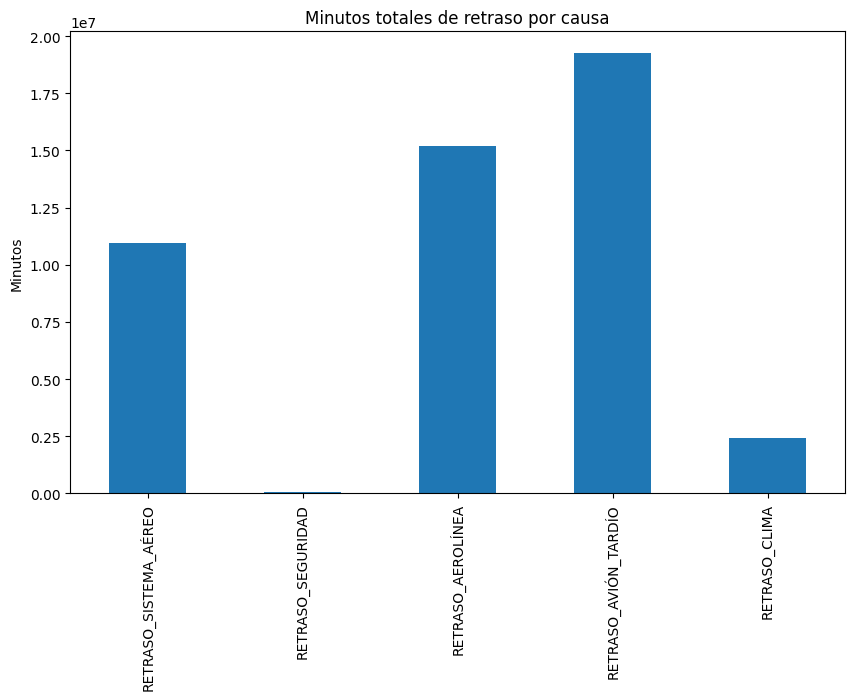

In [14]:
import matplotlib.pyplot as plt

causas = ['RETRASO_SISTEMA_AÉREO','RETRASO_SEGURIDAD',
          'RETRASO_AEROLÍNEA','RETRASO_AVIÓN_TARDÍO','RETRASO_CLIMA']

datos[causas].sum().plot(kind='bar', figsize=(10,6))
plt.title("Minutos totales de retraso por causa")
plt.ylabel("Minutos")
plt.show()

📊 **Comparación de magnitudes**
| Categoría de retraso | Rango en minutos | Interpretación |
|----------------------|------------------|----------------|
|Puntualidad aceptada  | 0–15 | Normal, sin impacto significativo |
|Retraso leve  |16–30  | Aún tolerable, frecuente en operaciones |
|Retraso moderado  |31–60  | Ya afecta conexiones y logística |
| Retraso grave |  >60| Impacto fuerte en pasajeros y aerolínea |
|Retraso extremo|>180|Casos excepcionales, suelen implicar compensaciones|






🔄 **Relación entre variable que explican el RETRASO_AVIÓN_TARDÍO.**

- Un RETRASO_LLEGADA positivo puede provocar que el avión llegue tarde al aeropuerto de origen.
- Ese mismo avión necesita tiempo para desembarcar pasajeros, cargar combustible, embarcar nuevos pasajeros y realizar rodaje, puede generar un RETRASO_SALIDA positivo en su siguiente vuelo desde el aeropuerto de origen.
- Es el famoso efecto cascada (RETRASO_AVIÓN_TARDÍO): un retraso en llegada se transmite como retraso en salida.


🔎 **Ejemplo práctico**
Imagina un avión que debía salir a las 10:00:
- **Llega a la puerta a las 09:50, pero por problemas de embarque sale a las 10:20 →**
>- RETRASO_SALIDA = 20 min
>- RETRASO_AVIÓN_TARDÍO = 0 min (porque el avión estaba a tiempo, el retraso fue por otra causa).
- **Llega a la puerta a las 10:30 porque venía atrasado de otro vuelo →**
>- RETRASO_SALIDA = 30 min
>- RETRASO_AVIÓN_TARDÍO = 30 min (el retraso de salida se explica totalmente por la llegada tardía).
- **Llega a las 10:20 y además hay problemas de embarque hasta las 10:40 →**
>- RETRASO_SALIDA = 40 min
>- RETRASO_AVIÓN_TARDÍO = 20 min (solo parte del retraso se debe al avión tardío).


/tmp/ipython-input-2148583540.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


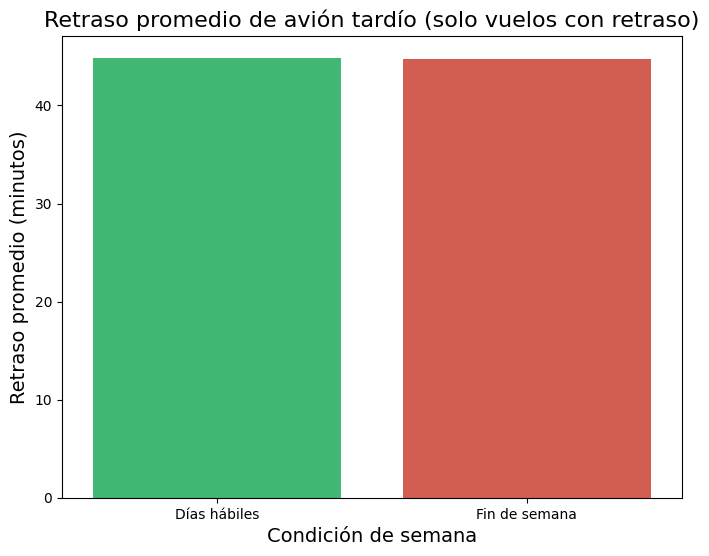

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear columna booleana para fin de semana
datos['es_fin_de_semana'] = datos['DÍA_SEMANA'].isin([6, 7])

# Filtrar solo vuelos con retraso positivo
datos_filtrados = datos[datos['RETRASO_AVIÓN_TARDÍO'] > 0]

# Calcular promedio de retraso por condición (hábil vs fin de semana)
promedios = datos_filtrados.groupby('es_fin_de_semana')['RETRASO_AVIÓN_TARDÍO'].mean().reset_index()

# Mapear valores a etiquetas en español
promedios['es_fin_de_semana'] = promedios['es_fin_de_semana'].map({True: 'Fin de semana', False: 'Días hábiles'})

# Crear gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(
    x='es_fin_de_semana',
    y='RETRASO_AVIÓN_TARDÍO',
    data=promedios,
    palette={'Días hábiles': '#2ECC71', 'Fin de semana': '#E74C3C'}
)

# Personalización
plt.title("Retraso promedio de avión tardío (solo vuelos con retraso)", fontsize=16)
plt.xlabel("Condición de semana", fontsize=14)
plt.ylabel("Retraso promedio (minutos)", fontsize=14)
plt.show()

/tmp/ipython-input-2821473560.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


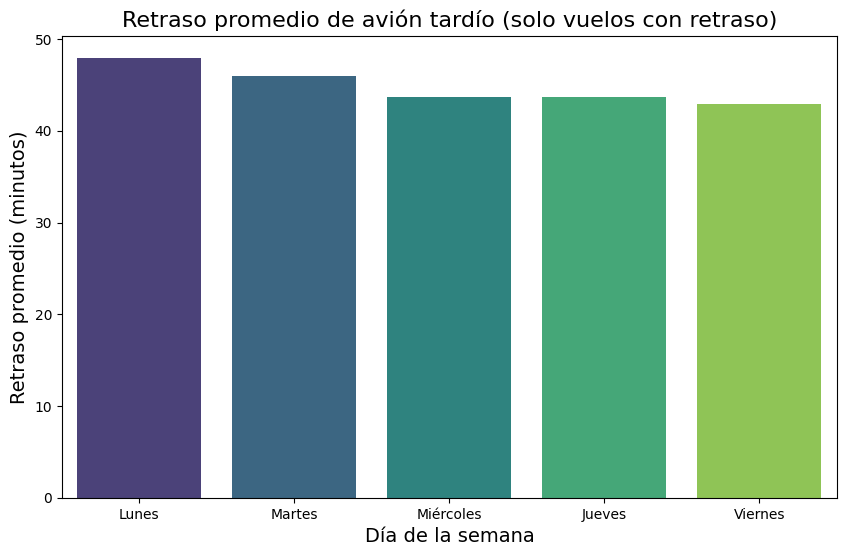

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo días de semana (lunes a viernes) y vuelos con retraso > 0
dias_semana = datos[(datos['DÍA_SEMANA'].isin([1,2,3,4,5])) & (datos['RETRASO_AVIÓN_TARDÍO'] > 0)]

# Calcular promedio de retraso por día
promedios = dias_semana.groupby('DÍA_SEMANA')['RETRASO_AVIÓN_TARDÍO'].mean().reset_index()

# Mapear números a nombres de días
map_dias = {1:'Lunes', 2:'Martes', 3:'Miércoles', 4:'Jueves', 5:'Viernes'}
promedios['DÍA_SEMANA'] = promedios['DÍA_SEMANA'].map(map_dias)

# Crear gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(
    x='DÍA_SEMANA',
    y='RETRASO_AVIÓN_TARDÍO',
    data=promedios,
    palette='viridis'
)

# Personalización
plt.title("Retraso promedio de avión tardío (solo vuelos con retraso)", fontsize=16)
plt.xlabel("Día de la semana", fontsize=14)
plt.ylabel("Retraso promedio (minutos)", fontsize=14)
plt.show()

/tmp/ipython-input-1641426789.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


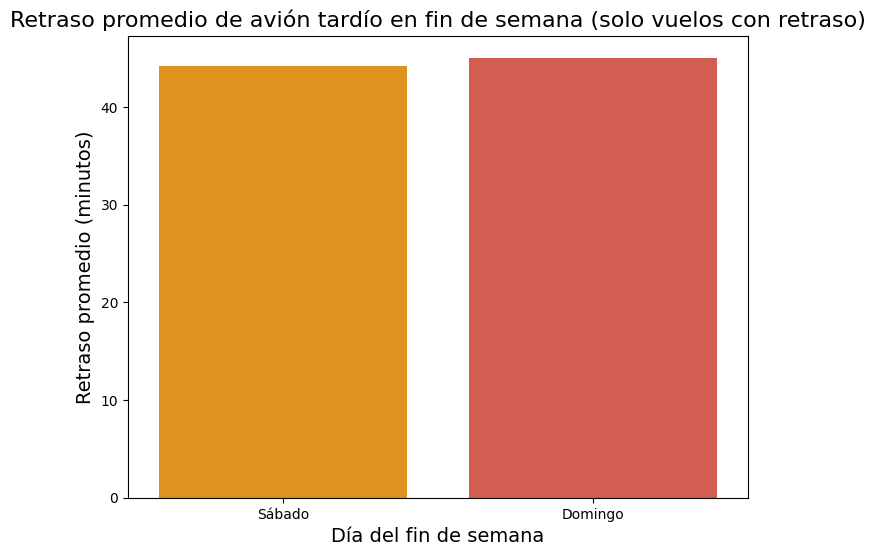

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo vuelos de fin de semana (sábado=6, domingo=7) y con retraso > 0
fin_semana = datos[(datos['DÍA_SEMANA'].isin([6,7])) & (datos['RETRASO_AVIÓN_TARDÍO'] > 0)]

# Calcular promedio de retraso por día del fin de semana
promedios = fin_semana.groupby('DÍA_SEMANA')['RETRASO_AVIÓN_TARDÍO'].mean().reset_index()

# Mapear números a nombres de días
map_dias = {6:'Sábado', 7:'Domingo'}
promedios['DÍA_SEMANA'] = promedios['DÍA_SEMANA'].map(map_dias)

# Crear gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(
    x='DÍA_SEMANA',
    y='RETRASO_AVIÓN_TARDÍO',
    data=promedios,
    palette={'Sábado':'#FF9800','Domingo':'#E74C3C'}  # naranja y rojo
)

# Personalización
plt.title("Retraso promedio de avión tardío en fin de semana (solo vuelos con retraso)", fontsize=16)
plt.xlabel("Día del fin de semana", fontsize=14)
plt.ylabel("Retraso promedio (minutos)", fontsize=14)
plt.show()

#**REGRESIÓN LINEAL SIMPLE**

📊 **Pasos para graficar**

1.-  Definir variables
- X: por ejemplo, departure_time.
- Y: delay.

2.- Calcular la recta de regresión
- Usar mínimos cuadrados para obtener $$\beta _0$$ y  $$\beta _1$$.
- Fórmulas:

$$\beta _1=\frac{\sum (X_i-\bar {X})(Y_i-\bar {Y})}{\sum (X_i-\bar {X})^2}$$

$$\beta _0=\bar {Y}-\beta _1\bar {X}$$

3.- Graficar
- Dibujar los puntos $$(X_i,Y_i)$$.
- Dibujar la recta de regresión:
$$\hat {Y}=\beta _0+\beta _1X$$

4.- Identificar puntos alejados
- Calcular residuos:

$$e_i=Y_i-\hat {Y}_i$$

- Los puntos con residuos grandes (positivos o negativos) son los que se demoran más o menos de lo esperado.


                             OLS Regression Results                             
Dep. Variable:     RETRASO_AVIÓN_TARDÍO   R-squared:                       0.635
Model:                              OLS   Adj. R-squared:                  0.635
Method:                   Least Squares   F-statistic:                 7.469e+05
Date:                  Fri, 26 Dec 2025   Prob (F-statistic):               0.00
Time:                          23:58:49   Log-Likelihood:            -2.0749e+06
No. Observations:                429277   AIC:                         4.150e+06
Df Residuals:                    429275   BIC:                         4.150e+06
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.

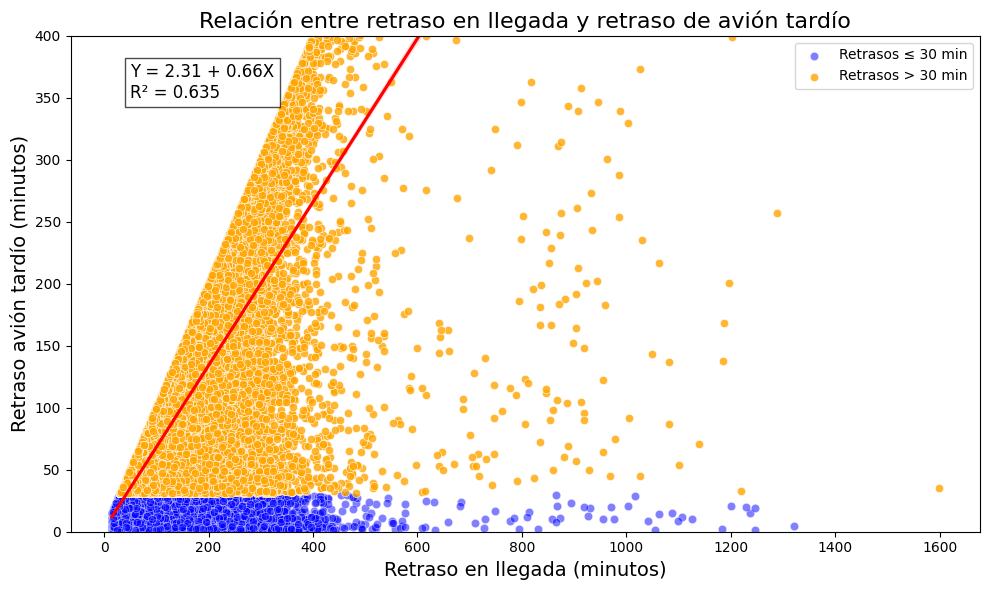

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Filtrar solo vuelos con retraso positivo
datos_filtrados = datos[datos['RETRASO_AVIÓN_TARDÍO'] > 0]

# Definir umbral para outliers (ejemplo: retrasos mayores a 30 minutos ya son relevantes)
umbral_outlier = 30
outliers = datos_filtrados[datos_filtrados['RETRASO_AVIÓN_TARDÍO'] > umbral_outlier]
no_outliers = datos_filtrados[datos_filtrados['RETRASO_AVIÓN_TARDÍO'] <= umbral_outlier]

# --- MODELO DE REGRESIÓN LINEAL SIMPLE ---
X = datos_filtrados['RETRASO_LLEGADA']
y = datos_filtrados['RETRASO_AVIÓN_TARDÍO']

X_const = sm.add_constant(X)  # agrega intercepto
modelo = sm.OLS(y, X_const).fit()

# Extraer coeficientes para la ecuación y R^2
intercepto = modelo.params['const']
pendiente = modelo.params['RETRASO_LLEGADA']
r2 = modelo.rsquared

print(modelo.summary())  # muestra coeficientes, R^2 y estadísticas

# --- GRÁFICO ---
plt.figure(figsize=(10,6))

# Nube de puntos normales (≤30 min, azul)
sns.scatterplot(
    x="RETRASO_LLEGADA",
    y="RETRASO_AVIÓN_TARDÍO",
    data=no_outliers,
    color="blue",
    alpha=0.5,
    label="Retrasos ≤ 30 min"
)

# Outliers (>30 min, naranja)
sns.scatterplot(
    x="RETRASO_LLEGADA",
    y="RETRASO_AVIÓN_TARDÍO",
    data=outliers,
    color="orange",
    alpha=0.8,
    label="Retrasos > 30 min"
)

# Línea de regresión (roja)
sns.regplot(
    x="RETRASO_LLEGADA",
    y="RETRASO_AVIÓN_TARDÍO",
    data=datos_filtrados,
    scatter=False,
    color="red",
    line_kws={"label":"Regresión lineal"}
)

# Personalización
plt.title("Relación entre retraso en llegada y retraso de avión tardío", fontsize=16)
plt.xlabel("Retraso en llegada (minutos)", fontsize=14)
plt.ylabel("Retraso avión tardío (minutos)", fontsize=14)

# Mostrar ecuación y R² en el gráfico
ecuacion = f"Y = {intercepto:.2f} + {pendiente:.2f}X\nR² = {r2:.3f}"
plt.text(
    50, 350, ecuacion, fontsize=12, color="black",
    bbox=dict(facecolor="white", alpha=0.7)
)

plt.legend()
plt.ylim(0, 400)  # límite para ver mejor los retrasos comunes y moderados
plt.tight_layout()
plt.show()

🔹 **Relación entre RETRASO_EN_LLEGADA y RETRASO_AVIÓN_TARDÍO**

- Más directa y causal: si un avión llega tarde de un vuelo anterior, inevitablemente su próxima salida se retrasa.
- Representa el efecto cascada: la llegada tardía es la causa raíz del retraso tardío.
- La regresión aquí suele mostrar una correlación más clara y lineal.

👉 Este gráfico es el más explicativo para entender cómo se transmiten los retrasos.




**📊 Interpretación de los resultados**
1. **Resultado clave **
- R² = 0.635
- El modelo explica el 63.5% de la variabilidad en el retraso por avión tardío.
- Es un valor relativamente alto para datos operativos, lo que confirma una relación fuerte entre ambas variables.


👉 Esto confirma que el retraso en llegada es un predictor sólido del retraso de avión tardío.

2. **Coeficientes**
-- Coeficiente de RETRASO_LLEGADA = 0.6594
- Por cada minuto adicional de retraso en la llegada, el retraso por avión tardío aumenta en promedio 0.66 minutos.
- Esto muestra un vínculo casi proporcional: los retrasos de llegada se transmiten directamente al avión tardío.

- Constante (intercepto) = 2.3067
- Incluso sin retraso de llegada, existe un retraso base de ~2.3 minutos en avión tardío.
- Esto refleja tiempos mínimos de rotación, operaciones en tierra o ajustes inevitables.

- Ejemplo: si un avión llega 100 minutos tarde, se espera que el retraso tardío sea ~66 minutos.
- Esto muestra que no todo el retraso de llegada se transmite: parte se absorbe o se mitiga en operaciones.

3. **Significancia estadística**
- t-statistic = 864.229, p-value = 0.000
- La relación es altamente significativa (p < 0.001).
- No hay duda estadística de que el retraso de llegada explica el retraso tardío.

4. **Pruebas de normalidad y residuos**
- Durbin-Watson = 1.947
- Cercano a 2 → no hay autocorrelación fuerte en los residuos.
- Omnibus, Jarque-Bera, Skew, Kurtosis
- Los residuos no son normales (skew -3, kurtosis 50).
- Esto indica colas pesadas y asimetría: hay vuelos con retrasos extremos que el modelo lineal no captura bien.
- Cond. No. 129
- No hay problemas graves de multicolinealidad (aunque aquí solo hay una variable).

🔹 Interpretación operativa
- El retraso de llegada es la causa principal del retraso por avión tardío.
- El modelo lineal captura bien la relación, pero los residuos muestran que hay outliers y distribuciones no normales (ej. vuelos con retrasos extremos por clima, seguridad o aerolínea).
- Esto sugiere que un modelo más robusto (Random Forest, XGBoost) puede manejar mejor esos casos extremos.



5. **Conclusión práctica**
- Síntesis: El retraso de llegada explica gran parte del retraso por avión tardío (63.5%).
- Coeficiente clave: cada minuto de retraso en llegada → +0.66 minutos de avión tardío.
- Limitación: los residuos no son normales, lo que indica que hay factores adicionales (clima, aerolínea, seguridad, sistema aéreo) que se  deben incluir para mejorar el ajuste.






 ## **Paso 1: Importar librería**

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# **Paso 2: Crear variable objetivo**

In [20]:
# Retraso grave si supera los 30 minutos
datos['RETRASO_GRAVE'] = (datos['RETRASO_SALIDA'] > 30).astype(int)

# **Paso 3: Definir variables explicativa**

In [21]:
X = datos[['HORA_SALIDA', 'RETRASO_AVIÓN_TARDÍO', 'DÍA_SEMANA', 'AEROLÍNEA']]
y = datos['RETRASO_GRAVE']

# One-hot encoding para variables categóricas
X = pd.get_dummies(X, columns=['DÍA_SEMANA','AEROLÍNEA'], drop_first=True)

# **Paso 4: Dividir en train/test**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **Paso 5: Entrenar modelo con balanceo de clases**

In [23]:
# Random Forest con class_weight para dar más importancia a retrasos graves
model = RandomForestClassifier(
    n_estimators=30,
    class_weight="balanced",
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=30,
                       random_state=42)

# **Paso 6: Evaluación inicial**

In [24]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[686611  48747]
 [ 40537  57176]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94    735358
           1       0.54      0.59      0.56     97713

    accuracy                           0.89    833071
   macro avg       0.74      0.76      0.75    833071
weighted avg       0.90      0.89      0.89    833071



- TN (686,611) → vuelos sin retraso grave correctamente clasificados.
- FP (48,747) → vuelos sin retraso grave que el modelo marcó como graves (falsas alarmas).
- FN (40,537) → vuelos con retraso grave que el modelo no detectó.
- TP (57,176) → vuelos con retraso grave correctamente detectados.
👉 El modelo logra detectar bastantes retrasos graves, pero todavía se le escapan más de 40 mil.

🔹 Métricas por clase
- Clase 0 (no grave)
- Precision: 0.94 → cuando predice “no grave”, acierta el 94%.
- Recall: 0.93 → detecta el 93% de los vuelos puntuales.
- F1: 0.94 → excelente rendimiento.
- Clase 1 (grave)
- Precision: 0.54 → cuando predice “grave”, solo el 54% realmente lo son.
- Recall: 0.59 → detecta el 59% de los retrasos graves.
- F1: 0.56 → rendimiento moderado.
👉 Aquí está el problema: el modelo se pierde el 41% de los retrasos graves.

🔹 Métricas globales
- Accuracy: 0.89 → parece alto, pero está influenciado por la mayoría de vuelos que son clase 0.
- Macro avg (0.76 recall) → muestra el desequilibrio entre clases.
- Weighted avg (0.89) → pondera por tamaño de clase, por eso se ve alto.




🎯 Conclusión operativa
- El modelo es muy bueno para vuelos puntuales, pero débil para alertar retrasos graves.
- Para el objetivo (alertar retrasos graves), lo importante es subir el recall de la clase 1, aunque eso implique más falsas alarmas.


# **Paso 7: Ajustar umbral de decisión**

In [25]:
# Probabilidades de clase positiva
y_proba = model.predict_proba(X_test)[:,1]

# Ajustar umbral (ejemplo: 0.3)
umbral = 0.3
y_pred_umbral = (y_proba >= umbral).astype(int)

print(confusion_matrix(y_test, y_pred_umbral))
print(classification_report(y_test, y_pred_umbral))

[[528160 207198]
 [ 26904  70809]]
              precision    recall  f1-score   support

           0       0.95      0.72      0.82    735358
           1       0.25      0.72      0.38     97713

    accuracy                           0.72    833071
   macro avg       0.60      0.72      0.60    833071
weighted avg       0.87      0.72      0.77    833071



	Clase 0 (puntual/no grave)

• 	528,160 vuelos correctamente clasificados.

• 	207,198 falsos positivos (se marcaron como graves sin serlo).

• 	Clase 1 (grave)

• 	70,809 vuelos graves correctamente detectados.

• 	26,904 falsos negativos (se escaparon).

👉 Comparado con el modelo inicial, ahora detectas muchos más retrasos graves (recall subió de 0.59 a 0.72), pero aumentaron muchísimo las falsas alarmas.

🔹 Métricas

• 	Clase 0 (no grave)

• 	Precision: 0.95

• 	Recall: 0.72 → bajó bastante porque hay muchos falsos positivos.

• 	F1: 0.82

• 	Clase 1 (grave)

• 	Precision: 0.25 → solo 1 de cada 4 alertas de retraso grave es correcta.

• 	Recall: 0.72 → ahora detectas el 72% de los retrasos graves (antes era 59%).

• 	F1: 0.38 → bajo, porque la precisión cayó mucho.

• 	Accuracy global: 0.72 → bajó bastante, porque el modelo está generando muchas falsas alarmas.


🎯 Conclusión operativa
- Ganancia: el modelo ahora detecta más retrasos graves (recall alto).
- Costo: la precisión se desploma (muchas falsas alarmas).
- Para un sistema de alertas operativas, este trade-off puede ser aceptable si tu prioridad es no perder retrasos graves, aunque recibas más avisos falsos.




# **Paso 8: Encontrar umbral óptimo con F1-score**

In [26]:
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"Umbral óptimo: {best_threshold:.2f}")
print(f"F1-score máximo: {best_f1:.3f}")

# Predicciones con umbral óptimo
y_pred_optimo = (y_proba >= best_threshold).astype(int)
print(confusion_matrix(y_test, y_pred_optimo))
print(classification_report(y_test, y_pred_optimo))

Umbral óptimo: 0.73
F1-score máximo: 0.638
[[727274   8084]
 [ 48119  49594]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96    735358
           1       0.86      0.51      0.64     97713

    accuracy                           0.93    833071
   macro avg       0.90      0.75      0.80    833071
weighted avg       0.93      0.93      0.92    833071



- Clase 0 (puntual/no grave)
- 727,274 vuelos correctamente clasificados.
- 8,084 falsos positivos (se marcaron como graves sin serlo).
- Clase 1 (grave)
- 49,594 vuelos graves correctamente detectados.
- 48,119 falsos negativos (se escaparon).
👉 El modelo ahora es mucho más equilibrado: pocos falsos positivos y un recall razonable para la clase grave.

🔹 Métricas por clase
- Clase 0 (no grave)
- Precision: 0.94
- Recall: 0.99
- F1: 0.96 → excelente rendimiento.
- Clase 1 (grave)
- Precision: 0.86 → cuando predice “grave”, acierta el 86%.
- Recall: 0.51 → detecta el 51% de los retrasos graves.
- F1: 0.64 → buen equilibrio entre precisión y recall.
👉 Comparado con los ajustes anteriores, ahora tienes menos falsas alarmas y un recall aceptable. El F1-score máximo (0.638) confirma que este umbral es el mejor balance entre precisión y recall.

🔹 Métricas globales
- Accuracy: 0.93 → muy alto.
- Macro avg (0.75 recall) → refleja que la clase minoritaria aún es más difícil de detectar, pero mejoró.
- Weighted avg (0.92 F1) → excelente rendimiento general.



🎯 Conclusión operativa
- El modelo con umbral óptimo detecta la mitad de los retrasos graves con alta precisión (86%).
- Es mucho más confiable que el ajuste manual con umbral bajo (0.3), que tenía recall alto pero precisión muy baja.
- Para un sistema de alertas, este es un punto de equilibrio sólido: menos ruido de falsas alarmas y buena capacidad de detección.


# **Paso 9: Graficar curva Precision-Recall**

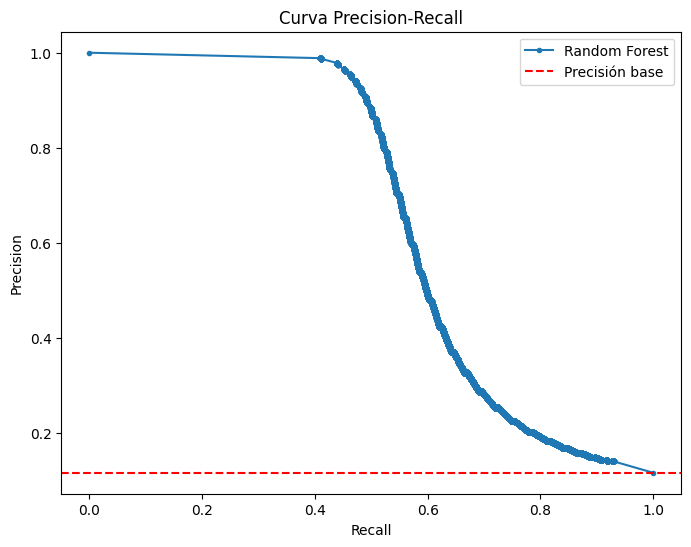

In [27]:
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.axhline(y=y_test.mean(), color='red', linestyle='--', label='Precisión base')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend()
plt.show()

# ** Paso 1: Instalar e importar SMOTE**

In [28]:
pip install imbalanced-learn

In [29]:
from imblearn.over_sampling import SMOTE

 # **Paso 2: Aplicar SMOTE al conjunto de entrenamiento**

In [30]:
# Rellenar NaN con la media de cada columna numérica
X_train_processed = X_train.fillna(X_train.mean())

# Crear instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar oversampling
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

print("Tamaño original:", X_train.shape, y_train.shape)
print("Tamaño balanceado:", X_train_res.shape, y_train_res.shape)

Tamaño original: (3332283, 21) (3332283,)
Tamaño balanceado: (5881712, 21) (5881712,)


# **Paso 3: Entrenar el modelo con datos balanceados**

In [31]:
model = RandomForestClassifier(
    n_estimators=30,
    random_state=42
)
model.fit(X_train_res, y_train_res)

RandomForestClassifier(n_estimators=30, random_state=42)

# **Paso 4: Evaluación inicial**

In [32]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[696180  39178]
 [ 38964  58749]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95    735358
           1       0.60      0.60      0.60     97713

    accuracy                           0.91    833071
   macro avg       0.77      0.77      0.77    833071
weighted avg       0.91      0.91      0.91    833071



# **Paso 5: Ajustar umbral y buscar el óptimo**

In [33]:
y_proba = model.predict_proba(X_test)[:,1]

# Curva Precision-Recall
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)

best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"Umbral óptimo con SMOTE: {best_threshold:.2f}")
print(f"F1-score máximo con SMOTE: {best_f1:.3f}")

# Evaluación con umbral óptimo
y_pred_optimo = (y_proba >= best_threshold).astype(int)
print(confusion_matrix(y_test, y_pred_optimo))
print(classification_report(y_test, y_pred_optimo))

Umbral óptimo con SMOTE: 0.77
F1-score máximo con SMOTE: 0.655
[[722619  12739]
 [ 43883  53830]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    735358
           1       0.81      0.55      0.66     97713

    accuracy                           0.93    833071
   macro avg       0.88      0.77      0.81    833071
weighted avg       0.93      0.93      0.93    833071



- Clase 0 (puntual/no grave)
- 722,619 vuelos correctamente clasificados.
- 12,739 falsos positivos (se marcaron como graves sin serlo).
- Clase 1 (grave)
- 53,830 vuelos graves correctamente detectados.
- 43,883 falsos negativos (se escaparon).
👉 Comparado con el modelo sin SMOTE, ahora se detecta más retrasos graves y con mejor equilibrio entre precisión y recall.

🔹 Métricas por clase
- Clase 0 (no grave)
- Precision: 0.94
- Recall: 0.98
- F1: 0.96 → excelente rendimiento.
- Clase 1 (grave)
- Precision: 0.81 → cuando predice “grave”, acierta el 81%.
- Recall: 0.55 → detecta el 55% de los retrasos graves (subió respecto al modelo original).
- F1: 0.66 → mejor equilibrio que antes.

🔹 Métricas globales
- Accuracy: 0.93 → muy alto.
- Macro avg (0.77 recall) → refleja que la clase minoritaria mejoró.
- Weighted avg (0.93 F1) → excelente rendimiento general.
👉 El F1-score máximo con SMOTE (0.655) es superior que  sin SMOTE (0.638). Esto confirma que el oversampling ayudó a mejorar la detección de retrasos graves.

🎯 Conclusión operativa
- El modelo ahora es más justo con la clase minoritaria: detecta más retrasos graves sin perder demasiada precisión.
- El recall sigue siendo moderado (55%), pero ya es mejor que el 51% que se tenía antes.
- El sistema de alertas es más confiable: menos falsos positivos que con umbral bajo, y más retrasos graves detectados que sin SMOTE.


                Variable  Importancia
0            HORA_SALIDA     0.487679
1   RETRASO_AVIÓN_TARDÍO     0.482881
15          AEROLÍNEA_NK     0.004062
17          AEROLÍNEA_UA     0.004061
20          AEROLÍNEA_WN     0.003518
10          AEROLÍNEA_DL     0.002694
13          AEROLÍNEA_HA     0.002397
8           AEROLÍNEA_AS     0.001878
16          AEROLÍNEA_OO     0.001664
14          AEROLÍNEA_MQ     0.001067
11          AEROLÍNEA_EV     0.001065
9           AEROLÍNEA_B6     0.001055
18          AEROLÍNEA_US     0.000729
5           DÍA_SEMANA_5     0.000718
3           DÍA_SEMANA_3     0.000711
4           DÍA_SEMANA_4     0.000709
6           DÍA_SEMANA_6     0.000692
12          AEROLÍNEA_F9     0.000672
7           DÍA_SEMANA_7     0.000633
2           DÍA_SEMANA_2     0.000618
19          AEROLÍNEA_VX     0.000498


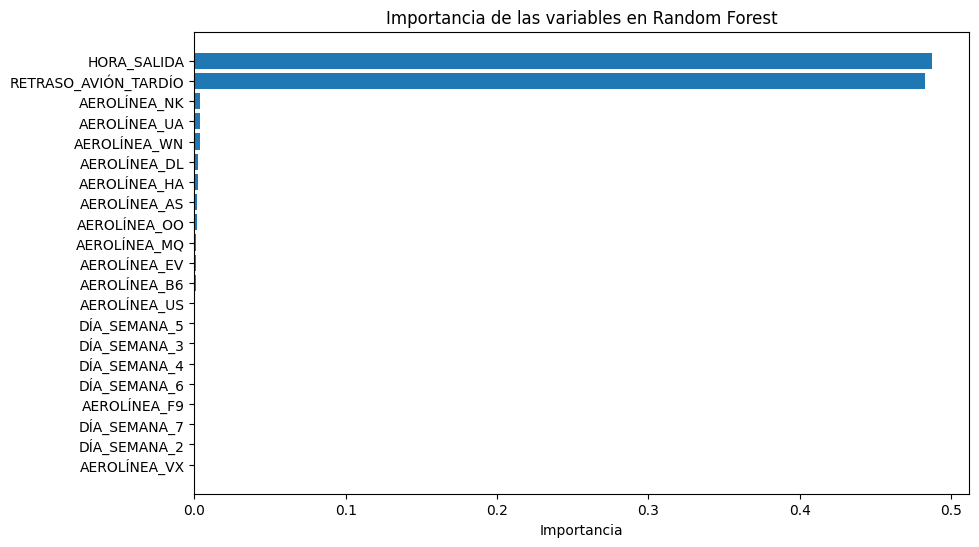

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Importancia de cada variable
importancias = model.feature_importances_

# Crear DataFrame ordenado
features = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

print(features)

# Gráfico de barras
plt.figure(figsize=(10,6))
plt.barh(features['Variable'], features['Importancia'])
plt.gca().invert_yaxis()  # Para que la más importante quede arriba
plt.xlabel('Importancia')
plt.title('Importancia de las variables en Random Forest')
plt.show()

Lectura del gráfico: “Importancia de las variables en Random Forest”
🔸 Variables más importantes
- HORA_SALIDA → es la variable más influyente en el modelo.
- Esto indica que la hora en que está programado el vuelo tiene un fuerte impacto en la probabilidad de retraso grave.
- Puede reflejar patrones operativos: vuelos en horas pico, congestión, rotación de aeronaves.
- RETRASO_AVIÓN_TARDÍO → segunda más importante.
- Como se espera, este retraso concentra el efecto acumulado de otros factores.
- Su alta importancia confirma que es un excelente predictor de retrasos graves.
🔸 Variables moderadas
- AEROLÍNEA_NK, UA, WN, DL, etc.
- Las aerolíneas tienen importancia intermedia.
- Esto sugiere que algunas aerolíneas tienen patrones de puntualidad o retraso que afectan la predicción.
🔸 Variables menos influyentes
- DÍA_SEMANA_2 a DÍA_SEMANA_7
- Los días de la semana tienen menor impacto.
- Puede que los patrones de retraso no varíen tanto entre lunes y domingo, o que estén absorbidos por otras variables como hora de salida.

🔹 ¿Qué significa esto para el modelo?
- El modelo está aprendiendo bien: prioriza variables operativas clave como hora de salida y avión tardío.
- Las aerolíneas aportan contexto, pero no dominan la predicción.
- Los días de la semana tienen poco peso, se podría considerar reducir su presencia si se quiere simplificar el modelo.

🎯 Conclusión operativa
- Mantener todas las variables, pero ahora se sabe cuáles son las más influyentes.
- Usar esta información para:
- Hacer un modelo más simple con solo las variables top.
- Analizar por qué ciertas aerolíneas o horarios generan más retrasos graves.
- Comunicar a equipos operativos qué factores deben monitorear más de cerca.
